In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams.update({'figure.figsize': (12,6)})
matplotlib.rcParams["axes.grid"] = True

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('my_BRENT2019.csv', index_col=[0], parse_dates=[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2010-09-01 to 2019-09-01
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Значение         2667 non-null   float64
 1   year             2667 non-null   int64  
 2   month            2667 non-null   int64  
 3   dayofmonth       2667 non-null   int64  
 4   quarter          2667 non-null   int64  
 5   dayofyear        2667 non-null   int64  
 6   weekofyear       2667 non-null   int64  
 7   dayofweek        2667 non-null   int64  
 8   is_holiday       2667 non-null   int64  
 9   is_prev_holiday  2667 non-null   int64  
 10  is_next_holiday  2667 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 250.0 KB


In [4]:
data.sort_index(inplace=True)

In [5]:
# Курс доллара
rub_doll = pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx', index_col=[1])
rub_doll.drop(columns=['nominal', 'cdx'], inplace=True)
rub_doll.rename(columns={'curs':'curs dollar'},inplace=True)
rub_doll.index = pd.to_datetime(rub_doll.index)
rub_doll.head()

,curs dollar
data,
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [6]:
rub_doll.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2228 entries, 2010-09-01 to 2019-08-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   curs dollar  2228 non-null   float64
dtypes: float64(1)
memory usage: 34.8 KB


In [7]:
# Курс Евро
rub_euro = pd.read_excel('RC_E01_09_2010_T01_09_2019.xlsx', index_col=[1])
rub_euro.drop(columns=['nominal', 'cdx'], inplace=True)
rub_euro.rename(columns={'curs':'curs euro'},inplace=True)
rub_euro.index = pd.to_datetime(rub_euro.index)
rub_euro.head()

,curs euro
data,
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


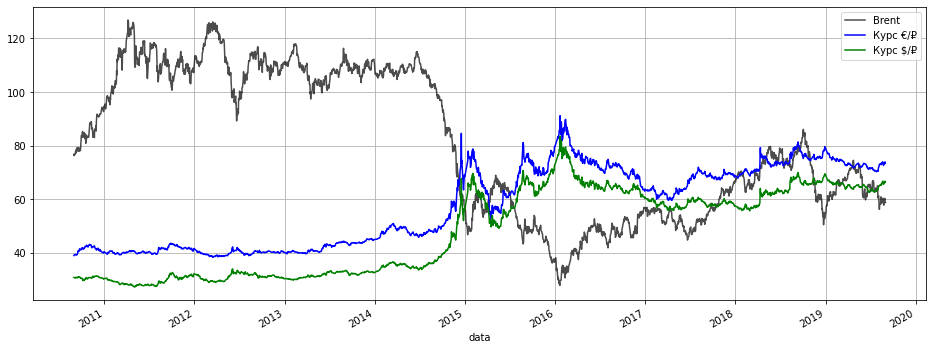

In [8]:
plt.figure(figsize=(16, 6))
data['Значение'].plot(color = 'black', alpha = 0.7, label = 'Brent')
rub_euro['curs euro'].plot(color = 'b', label = 'Курс €/₽')
rub_doll['curs dollar'].plot(color = 'g', label = 'Курс $/₽')
plt.legend()
plt.show()

In [9]:
# Объединение данных
brent_data = pd.concat([data, rub_doll, rub_euro], axis=1)

In [10]:
brent_data.head(10).T

,2010-09-01,2010-09-02,2010-09-03,2010-09-04,2010-09-05,2010-09-06,2010-09-07,2010-09-08,2010-09-09,2010-09-10
Значение,76.3700,76.8900,76.5700,76.6200,76.63,76.87,77.2600,77.9300,77.2100,78.4100
year,2010.0000,2010.0000,2010.0000,2010.0000,2010.00,2010.00,2010.0000,2010.0000,2010.0000,2010.0000
month,9.0000,9.0000,9.0000,9.0000,9.00,9.00,9.0000,9.0000,9.0000,9.0000
dayofmonth,1.0000,2.0000,3.0000,4.0000,5.00,6.00,7.0000,8.0000,9.0000,10.0000
quarter,3.0000,3.0000,3.0000,3.0000,3.00,3.00,3.0000,3.0000,3.0000,3.0000
dayofyear,244.0000,245.0000,246.0000,247.0000,248.00,249.00,250.0000,251.0000,252.0000,253.0000
weekofyear,35.0000,35.0000,35.0000,35.0000,35.00,36.00,36.0000,36.0000,36.0000,36.0000
dayofweek,2.0000,3.0000,4.0000,5.0000,6.00,0.00,1.0000,2.0000,3.0000,4.0000
is_holiday,0.0000,0.0000,0.0000,0.0000,0.00,1.00,0.0000,0.0000,0.0000,0.0000
is_prev_holiday,0.0000,0.0000,0.0000,0.0000,1.00,0.00,0.0000,0.0000,0.0000,0.0000


In [11]:
# Сколько пропущенных значений
np.sum(brent_data.isna())

Значение           470
year               470
month              470
dayofmonth         470
quarter            470
dayofyear          470
weekofyear         470
dayofweek          470
is_holiday         470
is_prev_holiday    470
is_next_holiday    470
curs dollar        909
curs euro          909
dtype: int64

In [12]:
# Заполним пропуски последними известными значениями
brent_data['Значение'].fillna(method='ffill', inplace=True)
brent_data['curs dollar'].fillna(method='ffill', inplace=True)
brent_data['curs euro'].fillna(method='ffill', inplace=True)

In [13]:
# Перед ресемплингом оставляем только необходимые колонки
brent_data = brent_data[['Значение','curs dollar','curs euro']]
brent_data.head()

,Значение,curs dollar,curs euro
2010-09-01,76.37,30.8669,39.0127
2010-09-02,76.89,30.8001,39.1654
2010-09-03,76.57,30.6858,39.2901
2010-09-04,76.62,30.6922,39.3505
2010-09-05,76.63,30.6922,39.3505


In [14]:
# Ресемплинг по неделям
brent_data_w= brent_data.resample('W').mean()
brent_data_w.head()

,Значение,curs dollar,curs euro
2010-09-05,76.616000,30.747440,39.233840
2010-09-12,77.673333,30.777050,39.302883
2010-09-19,78.590000,30.887129,39.984557
2010-09-26,78.558571,31.003800,41.040657
2010-10-03,81.582857,30.585086,41.382686


In [15]:
brent_data_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2010-09-05 to 2019-09-01
Freq: W-SUN
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Значение     470 non-null    float64
 1   curs dollar  470 non-null    float64
 2   curs euro    470 non-null    float64
dtypes: float64(3)
memory usage: 14.7 KB


In [16]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
# Тест Дикки-Фуллера
adfuller(brent_data_w['Значение'], regression='ctt')

(-2.7898146819883323,
 0.403898464758023,
 5,
 464,
 {'1%': -4.396274283817996,
  '5%': -3.8451769989336255,
  '10%': -3.561172289966388},
 1974.0745861660207)

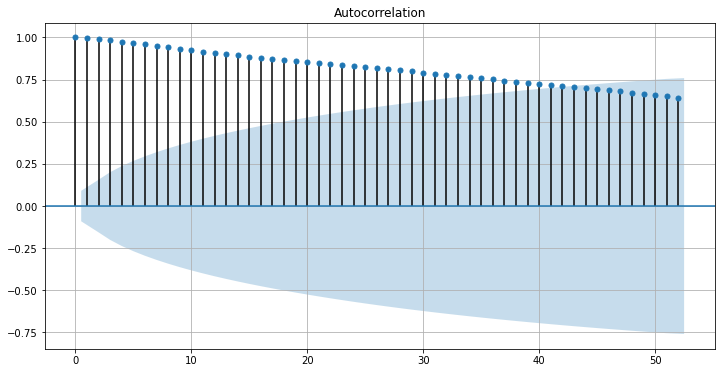

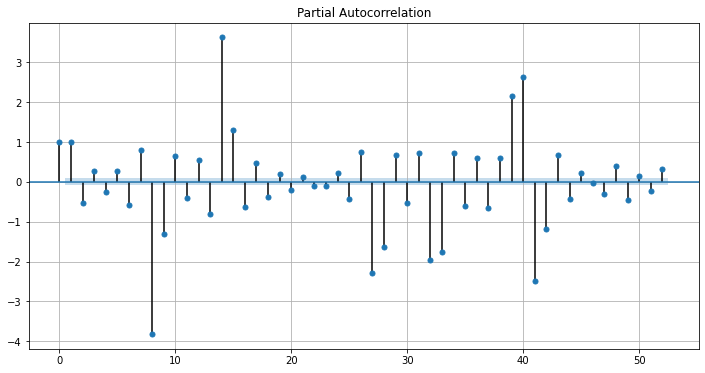

In [18]:
plot_acf(brent_data_w['Значение'], lags=52)
plt.show()
plot_pacf(brent_data_w['Значение'], lags=52)
plt.show()

#### Ряд нестационарный, зависит от длинной истории

In [19]:
# Сделаем 1-е разности
brent_data_w['d_brent'] = brent_data_w['Значение'].diff(1)
brent_data_w['doll_brent'] = brent_data_w['curs dollar'].diff(1)
brent_data_w['euro_brent'] = brent_data_w['curs euro'].diff(1)
brent_data_w.dropna(inplace=True)

In [20]:
# Проверим разности на стационарность
adf = adfuller(brent_data_w['d_brent'], regression='ctt')
adf

(-13.687495282868726,
 2.532471418398957e-22,
 1,
 467,
 {'1%': -4.396111652921828,
  '5%': -3.84509447012365,
  '10%': -3.5611212965378463},
 1975.107911794324)

In [21]:
print(f'p-value = {adf[1]:.6f} - Ряд стационарен')

p-value = 0.000000 - Ряд стационарен


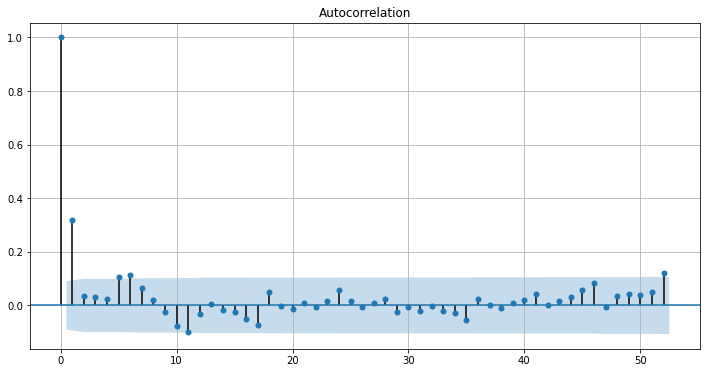

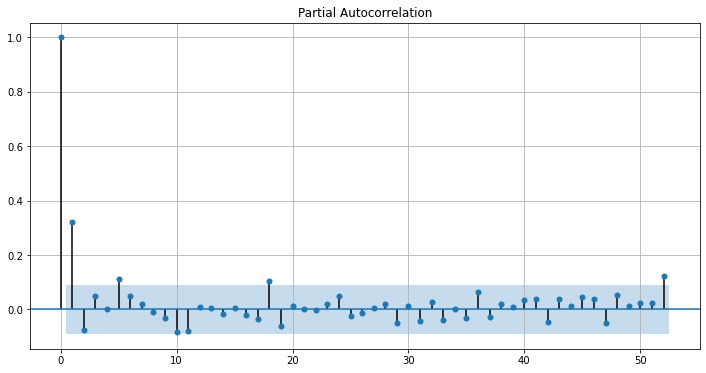

In [22]:
plot_acf(brent_data_w['d_brent'], lags=52)
plt.show()
plot_pacf(brent_data_w['d_brent'], lags=52)
plt.show()

#### Влияет только первое значение по глубине истории.

#### Построение модели

In [23]:
S = 0
d, D = 1, 0
p, P = 6, 0
q, Q = 6, 0

ps, Ps = np.arange(0, p + 1), np.arange(0, P + 1)
qs, Qs = np.arange(0, q + 1), np.arange(0, Q + 1)

In [24]:
from itertools import product
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

49

In [25]:
# Перебор параметров
results = []
opt_aic = float('inf')
warnings.filterwarnings('ignore')

for n, param in enumerate(parameters_list):
    try:
        model=SARIMAX(brent_data_w['Значение'].values[330:430], order=(param[0], d, param[1]), 
                      seasonal_order=(param[2], D, param[3], S), 
                                enforce_stationarity= False ,
                                enforce_invertibility=False).fit(disp=-1)
    except:
        continue
    aic = model.aic
    if aic < opt_aic:
        opt_model = model
        opt_aic = aic
        opt_param = param
    results.append([param, model.aic])

In [26]:
result_table = pd.DataFrame(results, columns=['parameters', 'aic'])
result_table.sort_values(by='aic', ascending=True).head()

,parameters,aic
6,"(0, 6, 0, 0)",370.644458
33,"(4, 5, 0, 0)",371.401268
5,"(0, 5, 0, 0)",371.611260
27,"(3, 6, 0, 0)",372.310893
41,"(5, 6, 0, 0)",372.322891


In [27]:
# Лучшая модель
print(opt_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 6)   Log Likelihood                -178.322
Date:                Sun, 19 Jul 2020   AIC                            370.644
Time:                        19:02:59   BIC                            388.297
Sample:                             0   HQIC                           377.769
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4418      0.124      3.564      0.000       0.199       0.685
ma.L2          0.1026      0.115      0.893      0.372      -0.122       0.328
ma.L3          0.0294      0.109      0.270      0.7

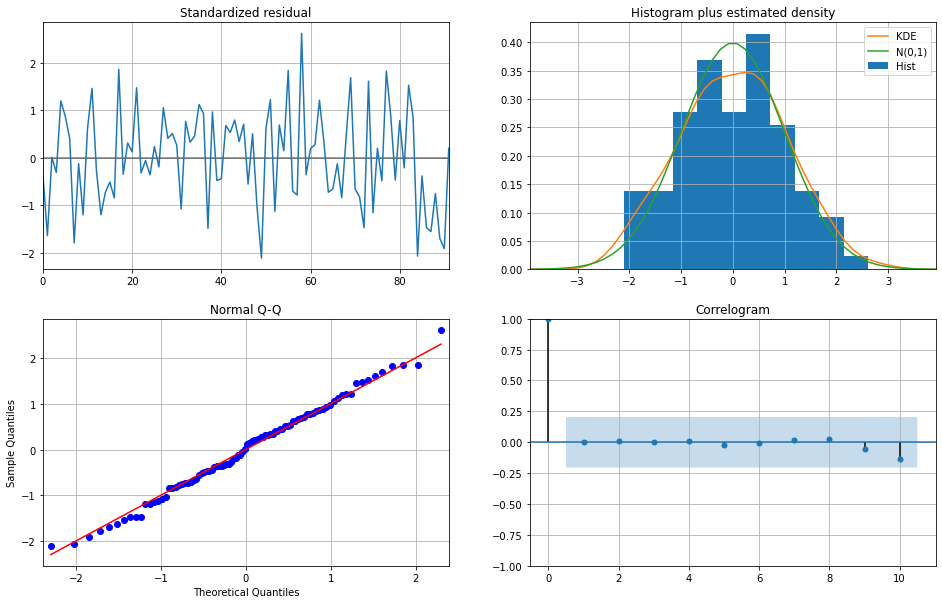

In [28]:
# Распределение остатков
opt_model.plot_diagnostics(figsize=(16, 10))
plt.show()

#### Распределение остатков близко к нормальному. Остатки стационарны.   
Рабочая модель:   
p = 0   
d = 1 - учитываем 1-е разности   
q = 6     
сезона нет.

In [29]:
brent_data_w.shape

(469, 6)

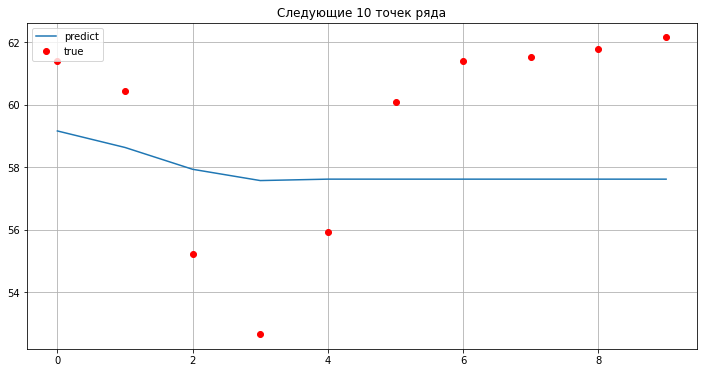

In [31]:
final_model=SARIMAX(brent_data_w['Значение'].values[330:430], order=(0, 1, 6), seasonal_order=(0,0,0,0) ,
                                enforce_stationarity= False,
                                enforce_invertibility=False).fit(disp=-1)
pred_dynamic = final_model.forecast(10)    #делаем предсказание на 10 точек от текущего
 
plt.plot(pred_dynamic, label='predict' )
plt.plot(brent_data_w['Значение'].values[430:440],'or',label='true')
plt.title('Следующие 10 точек ряда')
plt.legend()
plt.plot()
plt.show()

#### Горизонт прогноза $h = 1$
h = 1   
q = 6   
p = 0 

In [32]:
h = 1
# Добавим признаки
# Сглаживание
brent_data_w['ma1'] = brent_data_w['Значение'].rolling(q).mean()
brent_data_w = brent_data_w.iloc[1:,:]
brent_data_w.head(8)

,Значение,curs dollar,curs euro,d_brent,doll_brent,euro_brent,ma1
2010-09-19,78.590000,30.887129,39.984557,0.916667,0.110079,0.681674,NaN
2010-09-26,78.558571,31.003800,41.040657,-0.031429,0.116671,1.056100,NaN
2010-10-03,81.582857,30.585086,41.382686,3.024286,-0.418714,0.342029,NaN
2010-10-10,84.152857,30.112129,41.636057,2.570000,-0.472957,0.253371,NaN
2010-10-17,83.392857,30.017657,41.987514,-0.760000,-0.094471,0.351457,80.658413
2010-10-24,82.810000,30.512871,42.491329,-0.582857,0.495214,0.503814,81.514524
2010-10-31,83.330000,30.562071,42.509329,0.520000,0.049200,0.018000,82.304524
2010-11-07,87.003333,30.777117,43.020217,3.673333,0.215045,0.510888,83.711984


In [33]:
brent_data_w['p1'] = 0
brent_data_w['p1'].values[1:] = brent_data_w['Значение'].values[:-1]
brent_data_w.head()

,Значение,curs dollar,curs euro,d_brent,doll_brent,euro_brent,ma1,p1
2010-09-19,78.590000,30.887129,39.984557,0.916667,0.110079,0.681674,NaN,0
2010-09-26,78.558571,31.003800,41.040657,-0.031429,0.116671,1.056100,NaN,78
2010-10-03,81.582857,30.585086,41.382686,3.024286,-0.418714,0.342029,NaN,78
2010-10-10,84.152857,30.112129,41.636057,2.570000,-0.472957,0.253371,NaN,81
2010-10-17,83.392857,30.017657,41.987514,-0.760000,-0.094471,0.351457,80.658413,84


In [34]:
# Построим целевой признак и признаки для обучения
brent_data_w.dropna(inplace=True)  
df = brent_data_w.iloc[p:-h,:].copy()  # входы модели 
df['target'] = 0
df['target']=brent_data_w.iloc[p+h:,0].values.copy()   # выход модели
brent_data_w.dropna(inplace=True)    
df.head()

,Значение,curs dollar,curs euro,d_brent,doll_brent,euro_brent,ma1,p1,target
2010-11-28,85.177143,31.213300,42.035414,0.500000,0.183700,-0.254143,85.091746,84,89.650000
2010-12-05,89.650000,31.332714,41.319029,4.472857,0.119414,-0.716386,86.231746,85,90.916667
2010-12-12,90.916667,31.143517,41.363267,1.266667,-0.189198,0.044238,87.496190,89,91.652857
2010-12-19,91.652857,30.759257,40.885357,0.736190,-0.384260,-0.477910,88.271111,90,93.527143
2010-12-26,93.527143,30.661157,40.373400,1.874286,-0.098100,-0.511957,89.266825,91,94.057143


#### Разделение данных на train и test

In [35]:
def split_data_b(df, split_date):
    return df.loc[df.index.get_level_values(df.index.name) <= split_date].copy(), \
           df.loc[df.index.get_level_values(df.index.name) >  split_date].copy()

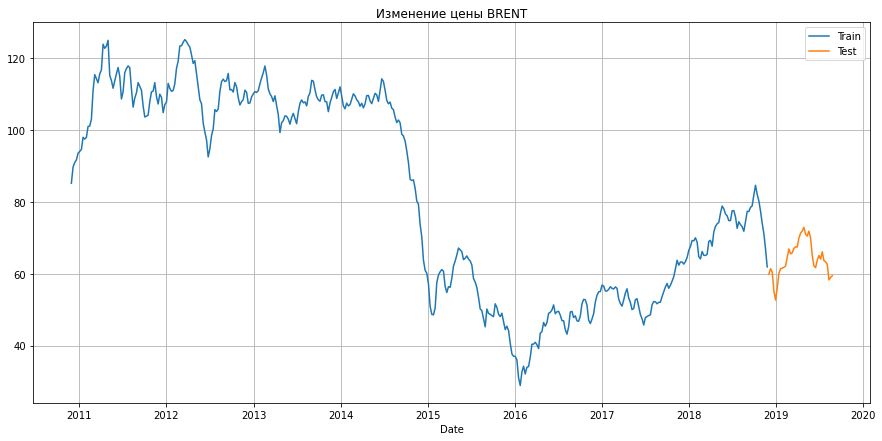

In [36]:
train, test = split_data_b(df, '2018-12-01')
plt.figure( figsize=(15, 7))
plt.plot(train.index,train.iloc[:,0], label='Train' )
plt.plot(test.index,test.iloc[:,0], label='Test')
plt.xlabel('Date')
plt.title('Изменение цены BRENT')
plt.legend(loc='best')
plt.show()

In [38]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [39]:
X_train.shape

(418, 8)

In [40]:
y_train.shape

(418,)

#### Обучение модели

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [42]:
model_g = GradientBoostingRegressor(max_depth=4, random_state=0, n_estimators=1000)

In [43]:
scx= StandardScaler().fit(X_train)
X_train_s = scx.transform(X_train)
X_test_s = scx.transform(X_test)

scy = StandardScaler().fit(y_train.values.reshape(y_train.shape[0], 1))
y_train_s = scy.transform(y_train.values.reshape(y_train.shape[0], 1))
y_test_s = scy.transform(y_test.values.reshape(y_test.shape[0], 1))

In [44]:
model_g.fit(X_train_s, y_train_s)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [45]:
# Наиболее важные признаки
feature_importances = pd.Series(model_g.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False)

Значение       0.818034
curs euro      0.164794
ma1            0.008873
curs dollar    0.004363
d_brent        0.001477
p1             0.000884
euro_brent     0.000842
doll_brent     0.000733
dtype: float64

Наибольшая связь - значение цены нефти и курс доллара/евро к рублю

#### Прогноз

In [46]:
y_test_pred_s = model_g.predict(X_test_s)

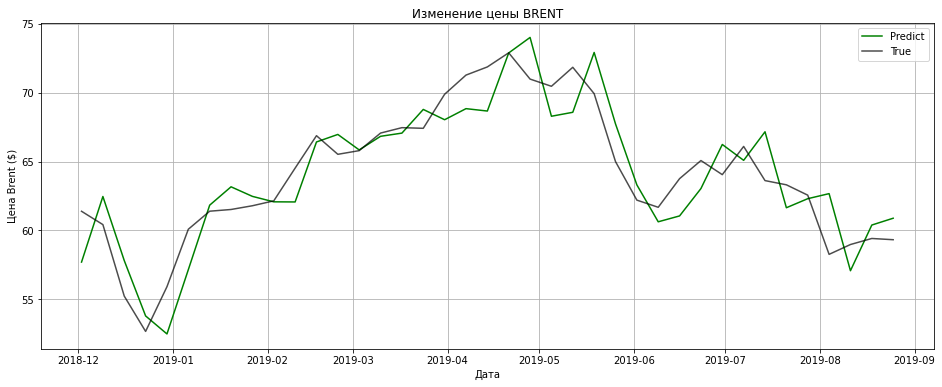

In [47]:
plt.figure(figsize=(16, 6))
plt.plot(test.index,scy.inverse_transform(y_test_pred_s), color='g', label='Predict')
plt.plot(test.index,scy.inverse_transform(y_test_s), color='black', alpha=0.7, label='True')
plt.xlabel('Дата')
plt.title('Изменение цены BRENT')
plt.ylabel('Цена Brent ($)')
plt.legend()
plt.show()

In [48]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [49]:
er_g = mean_absolute_percentage_error(y_true = scy.inverse_transform(y_test_s),
                                      y_pred = scy.inverse_transform(y_test_pred_s))
print(f'Ошибка MAPE GradientBoostingRegressor: {er_g:.4f}%')

Ошибка MAPE GradientBoostingRegressor: 8.6810%


In [59]:
df.head()

,Значение,curs dollar,curs euro,d_brent,doll_brent,euro_brent,ma1,p1,target
2010-11-28,85.177143,31.213300,42.035414,0.500000,0.183700,-0.254143,85.091746,84,89.650000
2010-12-05,89.650000,31.332714,41.319029,4.472857,0.119414,-0.716386,86.231746,85,90.916667
2010-12-12,90.916667,31.143517,41.363267,1.266667,-0.189198,0.044238,87.496190,89,91.652857
2010-12-19,91.652857,30.759257,40.885357,0.736190,-0.384260,-0.477910,88.271111,90,93.527143
2010-12-26,93.527143,30.661157,40.373400,1.874286,-0.098100,-0.511957,89.266825,91,94.057143


In [79]:
# Исключим курсы валют из прогноза, т.к. они коррелированы с текущим значением цены.
df_rec=df.iloc[:,[0,3,6,7,8]].copy()

In [80]:
df_rec.head()

,Значение,d_brent,ma1,p1,target
2010-11-28,85.177143,0.500000,85.091746,84,89.650000
2010-12-05,89.650000,4.472857,86.231746,85,90.916667
2010-12-12,90.916667,1.266667,87.496190,89,91.652857
2010-12-19,91.652857,0.736190,88.271111,90,93.527143
2010-12-26,93.527143,1.874286,89.266825,91,94.057143


In [81]:
train_c, test_c = split_data_b(df_rec, '2018-12-01')
X_train_c = train_c.iloc[:, :-1]
y_train_c = train_c.iloc[:, -1]
X_test_c = test_c.iloc[:, :-1]
y_test_c = test_c.iloc[:, -1]

model_gc = GradientBoostingRegressor(max_depth=10, random_state=0, n_estimators=1550)

scxc= StandardScaler().fit(X_train_c)
X_train_cs = scxc.transform(X_train_c)
X_test_cs = scxc.transform(X_test_c)

scyc= StandardScaler().fit(y_train_c.values.reshape(y_train_c.shape[0], 1))
y_train_cs = scyc.transform(y_train_c.values.reshape(y_train_c.shape[0], 1))
y_test_cs = scyc.transform(y_test_c.values.reshape(y_test_c.shape[0], 1))

model_gc.fit(X_train_cs, y_train_cs)
y_test_pred_cs = model_gc.predict(X_test_cs)

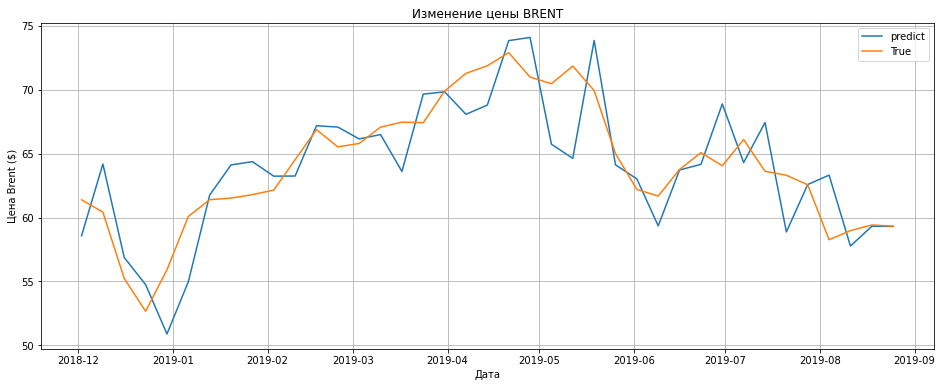

In [82]:
plt.figure( figsize=(16, 6))
plt.plot(test_c.index,scyc.inverse_transform(y_test_pred_cs), label='predict' )
plt.plot(test_c.index,scyc.inverse_transform(y_test_cs), label='True')
plt.xlabel('Дата')
plt.title('Изменение цены BRENT')
plt.ylabel('Цена Brent ($)')
plt.legend()
plt.show()

In [83]:
er_g = mean_absolute_percentage_error(y_true = scyc.inverse_transform(y_test_cs),
                                      y_pred = scyc.inverse_transform(y_test_pred_cs))
print(f'Ошибка MAPE GradientBoostingRegressor: {er_g:.4f}%')

Ошибка MAPE GradientBoostingRegressor: 8.8748%


#### Рекурсивное прогнозирование

In [85]:
# Начало исходной тестовой части данных для рекурсивной модели
ind_test=np.where(df_rec.index.get_level_values(df_rec.index.name) == '2019-01-06')[0][0]
df_rec_test = df_rec.iloc[ind_test-q+1:,:].copy()
df_rec_test.head(5+q)

,Значение,d_brent,ma1,p1,target
2018-12-02,59.882857,-2.002857,68.550000,61,61.390000
2018-12-09,61.390000,1.507143,65.877381,59,60.422857
2018-12-16,60.422857,-0.967143,63.606905,61,55.232857
2018-12-23,55.232857,-5.190000,60.953095,60,52.668571
2018-12-30,52.668571,-2.564286,58.580476,55,55.916000
2019-01-06,55.916000,3.247429,57.585524,52,60.085714
2019-01-13,60.085714,4.169714,57.619333,55,61.395714
2019-01-20,61.395714,1.310000,57.620286,60,61.520000
2019-01-27,61.520000,0.124286,57.803143,61,61.791429
2019-02-03,61.791429,0.271429,58.896238,61,62.145714


In [86]:
df_rec_test.shape

(39, 5)

In [87]:
# Рекурсии
h_step = 20  # число шагов модели в рекурсивной форме

for i in range(h_step):
    f_w = scxc.transform(df_rec_test.iloc[i+q, :-1].values.reshape(1, 4))
    df_rec_test.iloc[i+q+1, 0] = scyc.inverse_transform(model_gc.predict(f_w))[0]
    df_rec_test.iloc[i+q+1, 1] = df_rec_test.iloc[i+q+1, 0] - df_rec_test.iloc[i+q, 0] 
    df_rec_test.iloc[i+q+1, 2] = np.mean(df_rec_test.iloc[i+1:i+q+1, 0] )
    df_rec_test.iloc[i+q+1, 2] = df_rec_test.iloc[i+q, 0] 

In [88]:
df_rec_test.head(5+q)

,Значение,d_brent,ma1,p1,target
2018-12-02,59.882857,-2.002857,68.550000,61,61.390000
2018-12-09,61.390000,1.507143,65.877381,59,60.422857
2018-12-16,60.422857,-0.967143,63.606905,61,55.232857
2018-12-23,55.232857,-5.190000,60.953095,60,52.668571
2018-12-30,52.668571,-2.564286,58.580476,55,55.916000
2019-01-06,55.916000,3.247429,57.585524,52,60.085714
2019-01-13,60.085714,4.169714,57.619333,55,61.395714
2019-01-20,61.755750,1.670036,60.085714,60,61.520000
2019-01-27,63.231555,1.475805,61.755750,61,61.791429
2019-02-03,63.251766,0.020211,63.231555,61,62.145714


In [89]:
scyc.inverse_transform(y_test_pred_cs[:20])

array([58.57097051, 64.18476688, 56.87526861, 54.75586873, 50.89668584,
       54.97555531, 61.7557502 , 64.11493518, 64.36953211, 63.23497189,
       63.24710707, 67.17471605, 67.07604509, 66.14672404, 66.48911809,
       63.60293279, 69.65072769, 69.83009923, 68.07310774, 68.79476512])

#### h_step тестовых отсчетов:

- прямое прогнозирование (GB);
- рекурсивное прогнозирование (GB with recursion).

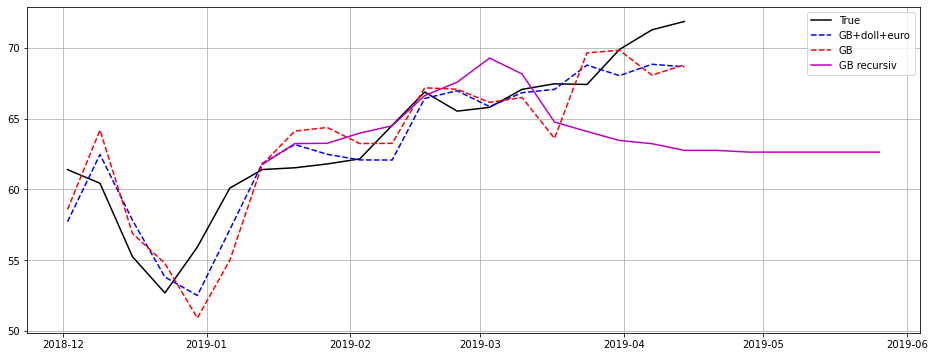

In [90]:
plt.figure(figsize=(16, 6))
plt.plot(y_test.index[:h_step],y_test.values[:h_step], color='black', label='True')
plt.plot(y_test.index[:h_step],scy.inverse_transform(y_test_pred_s[:h_step]),'--b',label='GB+doll+euro')
plt.plot(y_test.index[:h_step],scyc.inverse_transform(y_test_pred_cs[:h_step]), '--r',label='GB')
plt.plot(df_rec_test.index[q:h_step+q],df_rec_test.iloc[1+q:h_step+q+1, 0].values, 'm',label='GB recursiv')
plt.legend()
plt.show()

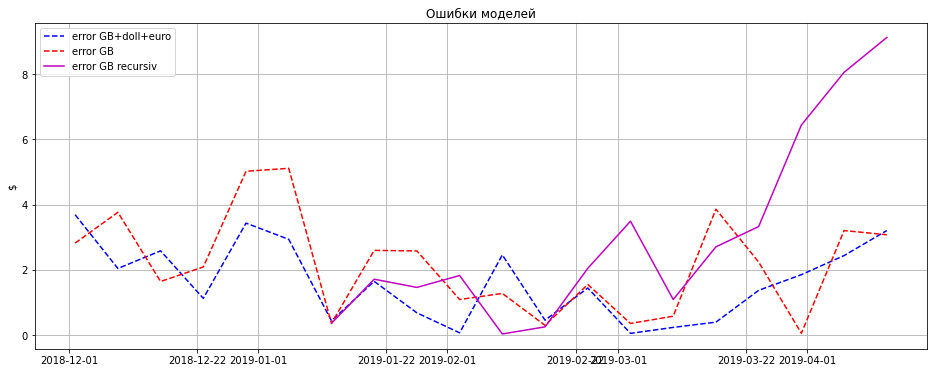

In [91]:
# Ошибки моделей
plt.figure(figsize=(16, 6))
plt.plot(y_test.index[:h_step],np.abs(scy.inverse_transform(y_test_pred_s[:h_step])-y_test.values[:h_step]),
         '--b',label='error GB+doll+euro')
plt.plot(y_test.index[:h_step],np.abs(scyc.inverse_transform(y_test_pred_cs[:h_step])-y_test.values[:h_step]),
         '--r',label='error GB')
plt.plot(df_rec_test.index[q:h_step],np.abs(df_rec_test.iloc[1+q:h_step+1, 0].values - y_test.values[q:h_step]),
         'm',label='error GB recursiv')
plt.title('Ошибки моделей')
plt.ylabel('$')
plt.legend()
plt.show()

### Вывод:

Курс валюты связан с ценой нефти, но скорее зависит от нее.    
Поэтому ряд с учетом курса и без него работает практически одинаково.

Рекурсивный прогноз слабее, но тенденцию ряда видно дальше, чем на p - истории.